In [1]:
#basic data and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

#clustering and utilities
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mmscaler = MinMaxScaler()
sscaler = StandardScaler()

#clustering evaluation
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

# Getting data, basic description

In [72]:
data = pd.read_csv('../Data/large.csv')

In [73]:
data.head()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
0,90000000,0,217673.05,125,0.304000,40,123,0,1.66,88,1,3,0.254742,1937.15,2161.790028
1,90000001,0,57.42,20,0.250000,17,90,0,7.32,88,4,6,0.393174,4.96,0.893866
2,90000002,0,1465076.90,1,0.000000,66,123,0,24.08,25,2,1,0.422991,0.00,229.333494
3,90000003,0,429840.54,46,0.239130,43,90,0,3.88,86,2,17,0.296019,43123.33,3121.939606
4,90000004,2,93356190.65,63,0.365079,0,186,0,2.77,100,1,1,0.067511,1814340.25,603026.545700


In [74]:
data.describe()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06
mean,9.050000e+07,0.400530,2.937814e+07,28.136660,0.331490,31.726469,91.863301,0.006851,44.768997,114.264231,1.996756,6.246905,0.255042,3.212197e+06,1.078914e+05
std,2.886753e+05,0.663837,4.650136e+08,55.464787,0.308724,25.749573,43.678328,0.082487,52.223190,77.830115,0.999137,16.322718,0.174461,1.820511e+08,3.420959e+06
min,9.000000e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,24.000000,0.000000,0.120000,1.000000,1.000000,0.000000,0.000026,0.000000e+00,0.000000e+00
25%,9.025000e+07,0.000000,9.053680e+04,1.000000,0.000000,0.000000,82.000000,0.000000,5.680000,72.000000,1.000000,1.000000,0.122934,1.592175e+02,2.249756e+01
50%,9.050000e+07,0.000000,4.316990e+05,3.000000,0.309917,32.000000,90.000000,0.000000,28.220000,95.000000,2.000000,1.000000,0.217838,4.934665e+03,4.699416e+02
75%,9.075000e+07,1.000000,1.529052e+06,30.000000,0.500000,54.000000,123.000000,0.000000,63.520000,131.000000,3.000000,4.000000,0.348258,4.920691e+04,3.577423e+03
max,9.100000e+07,2.000000,1.308870e+11,1472.000000,1.000000,126.000000,187.000000,1.000000,1281.110000,1295.000000,10.000000,700.000000,0.998780,1.186690e+11,2.155327e+09


## The customer id will be our index

In [3]:
data.set_index('cif')

,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
cif,,,,,,,,,,,,,,
90000000,0,217673.05,125,0.304000,40,123,0,1.66,88,1,3,0.254742,1937.15,2161.790028
90000001,0,57.42,20,0.250000,17,90,0,7.32,88,4,6,0.393174,4.96,0.893866
90000002,0,1465076.90,1,0.000000,66,123,0,24.08,25,2,1,0.422991,0.00,229.333494
90000003,0,429840.54,46,0.239130,43,90,0,3.88,86,2,17,0.296019,43123.33,3121.939606
90000004,2,93356190.65,63,0.365079,0,186,0,2.77,100,1,1,0.067511,1814340.25,603026.545700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90999995,0,490493.11,2,0.500000,24,32,0,61.84,62,1,1,0.041824,9045.30,354.923765
90999996,1,68851482.08,2,0.500000,0,151,0,48.11,145,1,1,0.098501,8862003.26,40738.246800
90999997,1,20814445.81,3,0.333333,0,186,0,87.81,176,2,1,0.383976,694.16,122913.123300


# Let's divide the dataset in terms of individuals, companies, others

In [75]:
df0 = data[data['category']==0]
df1 = data[data['category']==1]
df2 = data[data['category']==2]

In [76]:
# Remove non relavant categories in the subset
df0_n = df0.drop(columns=['category'])
df1_n = df1.drop(columns=['category','age','is_pep'])
df2_n = df2.drop(columns=['category','age','is_pep'])

## Individual

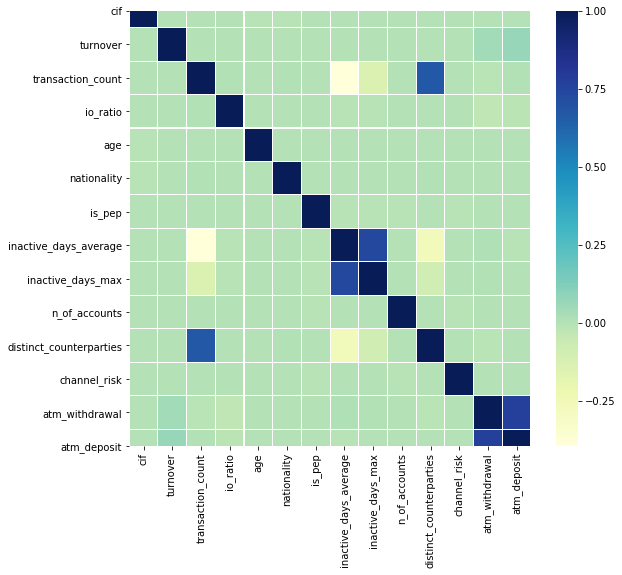

In [78]:
# Check correlations among features
corrmat0 = df0_n.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat0, ax = ax, cmap ='YlGnBu', linewidths = 0.1)

## Company

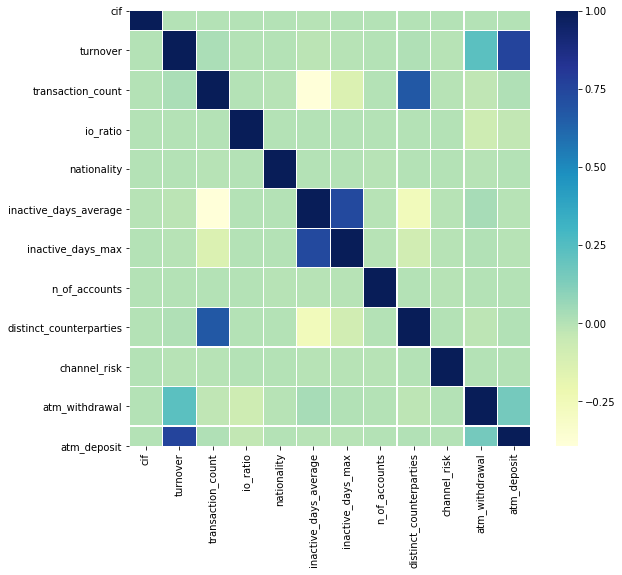

In [79]:
corrmat1 = df1_n.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat1, ax = ax, cmap ='YlGnBu', linewidths = 0.1)

## Other institution

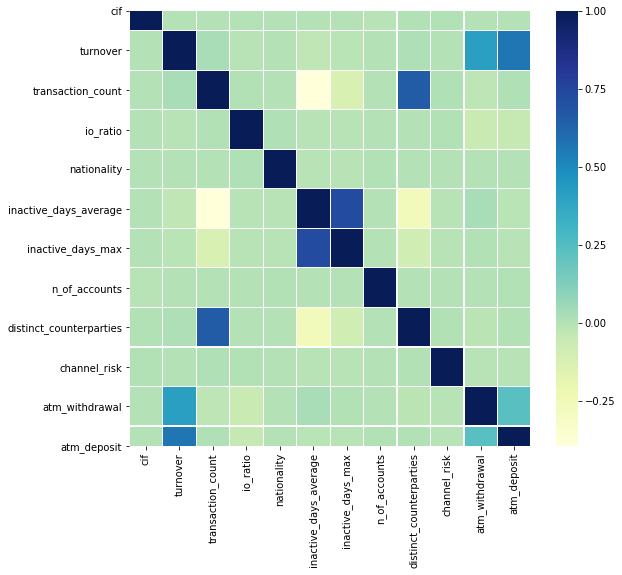

In [11]:
corrmat2 = df2_n.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat2, ax = ax, cmap ='YlGnBu', linewidths = 0.1)

# Focus on companies

In [87]:
Ncomp = df2_n.count()
print('Companies represent ' + str(Ncomp.cif*100/data.cif.count()) + '% of the total data' )

Companies represent 10.0287% of the total data


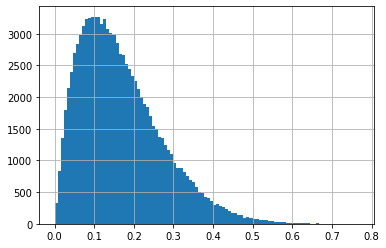

In [88]:
#Let's see the risk_channel ditribution - nice shape 
df2_n.channel_risk.hist(bins=100)

In [91]:
#Put an hard cut to check some features of interest
ncomp_hrisk = df2_n[df2_n.channel_risk>0.2].count().cif
print('Number of high risk companies is ' + str(ncomp_hrisk))
print(str(ncomp_hrisk*100/data.cif.count()) + '% of the total')

Number of high risk companies is 32559
3.2559% of the total


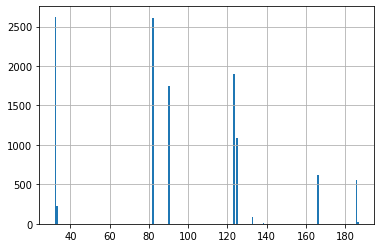

In [18]:
df2_n.nationality[df2_n.channel_risk>0.3].hist(bins=196)

In [96]:
df2_n[df2_n.channel_risk>0.3].groupby('nationality').cif.count().sort_values(ascending=False)

nationality
32     2624
82     2606
123    1893
90     1744
125    1091
166     616
186     552
33      220
133      81
187      27
138      11
Name: cif, dtype: int64

### Looks like Cabo Verde is expecially favoured to do ML https://www.knowyourcountry.com/capeverde1111

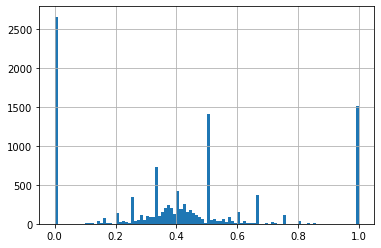

In [97]:
df2_n.io_ratio[df2_n.channel_risk>0.3].hist(bins=100)

### Having only or no incomes is also highly suspicios

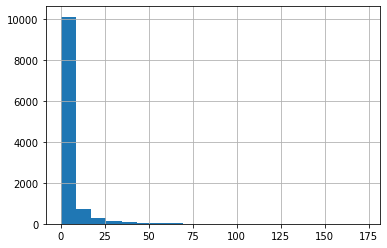

In [101]:
df2_n.distinct_counterparties[df2_n.channel_risk>0.3].hist(bins=20)

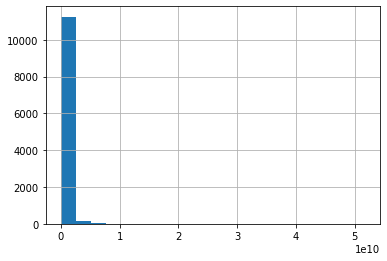

In [105]:
df2_n.turnover[df2_n.channel_risk>0.3].hist(bins=20)

## A first attempt on clustering

In [107]:
#here we transform the feature to be on the same scale
mmscaler.fit(df2_n)
df2_scaled = mmscaler.transform(df2_n)


In [108]:
# try brutally kmeans to see if separates bad from good
clf = KMeans(n_clusters=2, n_init= 20)
clf.fit_predict(df2_scaled)


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [109]:
metrics.silhouette_score(df2_scaled, labels, metric='euclidean')

0.23160401630163524

# score is not so high..